<a href="https://colab.research.google.com/github/sanketgawali123/-NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Netflix_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Problem Statement

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## In this project, you are required to do
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features

## Attribute Information

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

### Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
data = pd.read_csv(path)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
no_of_category = []
for categories in data.listed_in.values:
    len_categories = len(categories.split(","))
    no_of_category.append(len_categories)

In [ ]:
data['no_of_category'] = no_of_category

In [ ]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [ ]:
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
data['description'] = data['description'].apply( Apply_stemming )
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",in a futur where the elit inhabit an island pa...,3
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies","after a devast earthquak hit mexico city, trap...",2
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","when an armi recruit is found dead, his fellow...",2
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","in a postapocalypt world, rag-dol robot hide i...",3
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,a brilliant group of student becom card-count ...,1


In [ ]:
data['Length(description)'] = data['description'].apply(lambda x: len(x))

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'no_of_category', 'Length(description)'],
      dtype='object')

### Remove Punctuation

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
data['description'] = data['description'].apply(remove_punctuation)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,Length(description)
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",in a futur where the elit inhabit an island pa...,3,129
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",after a devast earthquak hit mexico city trap ...,2,126
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",when an armi recruit is found dead his fellow ...,2,134
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",in a postapocalypt world ragdol robot hide in ...,3,130
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,a brilliant group of student becom cardcount e...,1,128


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [ ]:
print("Number of stopwords in english : ", len(sw))

Number of stopwords in english :  179


### Remove Stopwords

In [ ]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [ ]:
data['description'] = data['description'].apply( remove_stopwords )
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,Length(description)
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,3,129
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devast earthquak hit mexico city trap survivor...,2,126
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2,134
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,3,130
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliant group student becom cardcount expert...,1,128


In [ ]:
data['listed_in'] = data['listed_in'].apply(remove_punctuation)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,Length(description)
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International TV Shows TV Dramas TV SciFi Fan...,futur elit inhabit island paradis far crowd sl...,3,129
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas International Movies,devast earthquak hit mexico city trap survivor...,2,126
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies International Movies,armi recruit found dead fellow soldier forc co...,2,134
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action Adventure Independent Movies SciFi Fa...,postapocalypt world ragdol robot hide fear dan...,3,130
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliant group student becom cardcount expert...,1,128


In [ ]:
data['listed_in'] = data['listed_in'].apply( remove_stopwords )
data.head( 2 )

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,Length(description)
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,international tv shows tv dramas tv scifi fantasy,futur elit inhabit island paradis far crowd sl...,3,129
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,dramas international movies,devast earthquak hit mexico city trap survivor...,2,126


In [ ]:
data['Length(listed-in)'] = data['listed_in'].apply(lambda x: len(x))
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,Length(description),Length(listed-in)
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,international tv shows tv dramas tv scifi fantasy,futur elit inhabit island paradis far crowd sl...,3,129,49
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,dramas international movies,devast earthquak hit mexico city trap survivor...,2,126,27
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,horror movies international movies,armi recruit found dead fellow soldier forc co...,2,134,34


## Silhouette score

In [ ]:
H_features_rec = data[['no_of_category' ,'Length(description)','Length(listed-in)']]
stdscaler = preprocessing.StandardScaler()

In [ ]:
H_features_rec.describe()

,no_of_category,Length(description),Length(listed-in)
count,7787.000000,7787.000000,7787.000000
mean,2.192243,131.508411,31.422627
std,0.786086,10.876642,14.093811
min,1.000000,52.000000,6.000000
25%,2.000000,127.000000,22.000000
50%,2.000000,133.000000,32.000000
75%,3.000000,138.000000,44.000000
max,3.000000,239.000000,73.000000


In [ ]:
H_rescale=stdscaler.fit_transform(H_features_rec)
H = H_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [ ]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters = n_clusters)
    preds = clusterer.fit_predict(H)
    centers = clusterer.cluster_centers_

    score = silhouette_score(H, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4639359949739445
For n_clusters = 3, silhouette score is 0.4471728650607281
For n_clusters = 4, silhouette score is 0.4659272440879707
For n_clusters = 5, silhouette score is 0.47936171611237594
For n_clusters = 6, silhouette score is 0.4734589778828223
For n_clusters = 7, silhouette score is 0.456758014089431
For n_clusters = 8, silhouette score is 0.41939382354634835
For n_clusters = 9, silhouette score is 0.4008562824401479
For n_clusters = 10, silhouette score is 0.3782825936360752
For n_clusters = 11, silhouette score is 0.3629846108812799
For n_clusters = 12, silhouette score is 0.35675690105427876
For n_clusters = 13, silhouette score is 0.3485687893932394
For n_clusters = 14, silhouette score is 0.3433642357948494
For n_clusters = 15, silhouette score is 0.3444793996141005


In [ ]:
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(14)

,n clusters,silhouette score
3,5,0.479
4,6,0.473
2,4,0.466
0,2,0.464
5,7,0.457
1,3,0.447
6,8,0.419
7,9,0.401
8,10,0.378
9,11,0.363


For n_clusters = 2 The average silhouette_score is : 0.4639359949739445
For n_clusters = 3 The average silhouette_score is : 0.4471728650607281
For n_clusters = 4 The average silhouette_score is : 0.4669915544799229
For n_clusters = 5 The average silhouette_score is : 0.47936171611237594
For n_clusters = 6 The average silhouette_score is : 0.47124472186438204
For n_clusters = 7 The average silhouette_score is : 0.4533094437743985
For n_clusters = 8 The average silhouette_score is : 0.41834076135344767
For n_clusters = 9 The average silhouette_score is : 0.3969920426124817
For n_clusters = 10 The average silhouette_score is : 0.3820996443353044
For n_clusters = 11 The average silhouette_score is : 0.35493945319005293
For n_clusters = 12 The average silhouette_score is : 0.35339348957715677
For n_clusters = 13 The average silhouette_score is : 0.3518353314370603
For n_clusters = 14 The average silhouette_score is : 0.3462608851261505
For n_clusters = 15 The average silhouette_score is : 

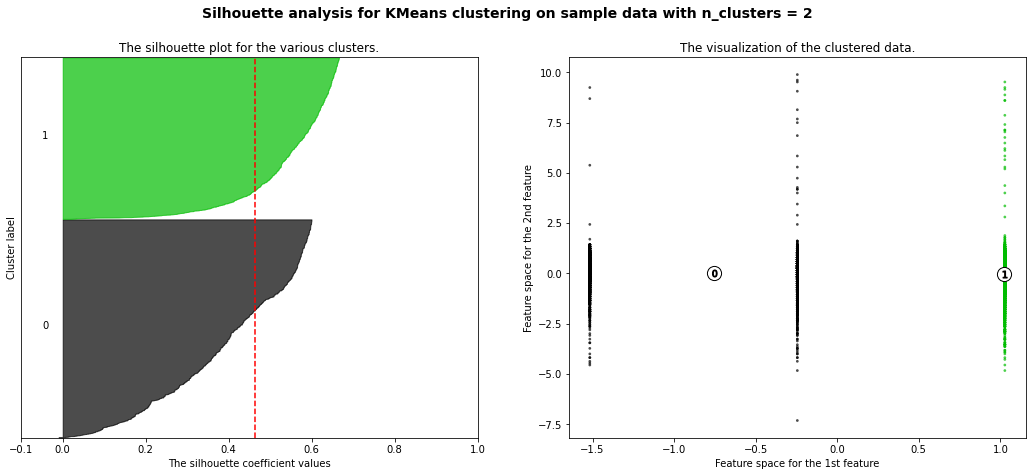

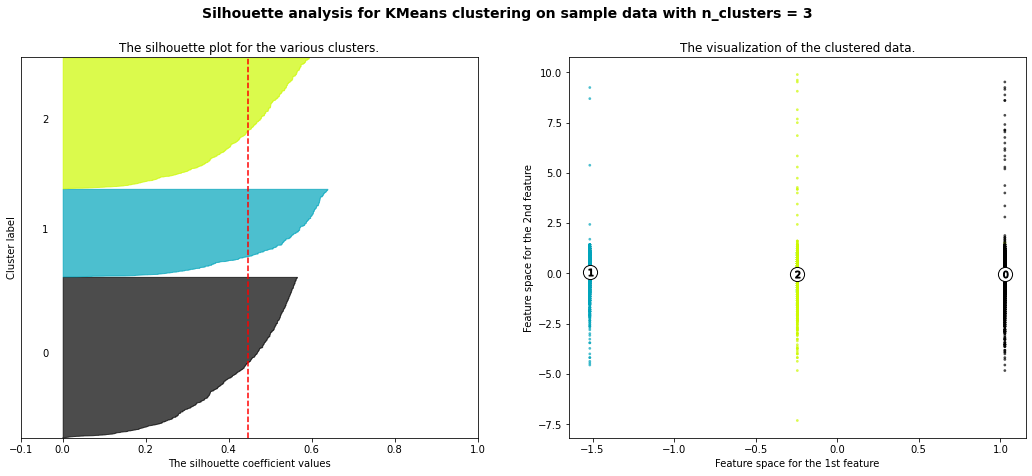

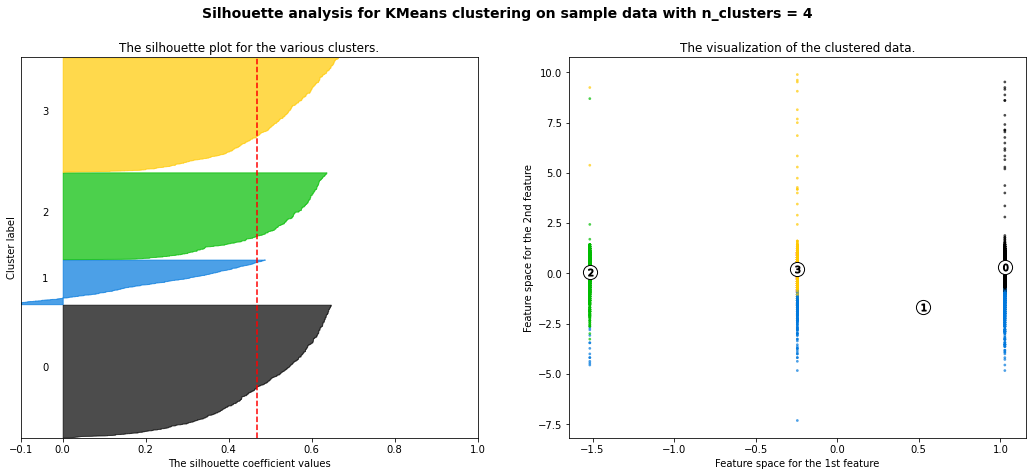

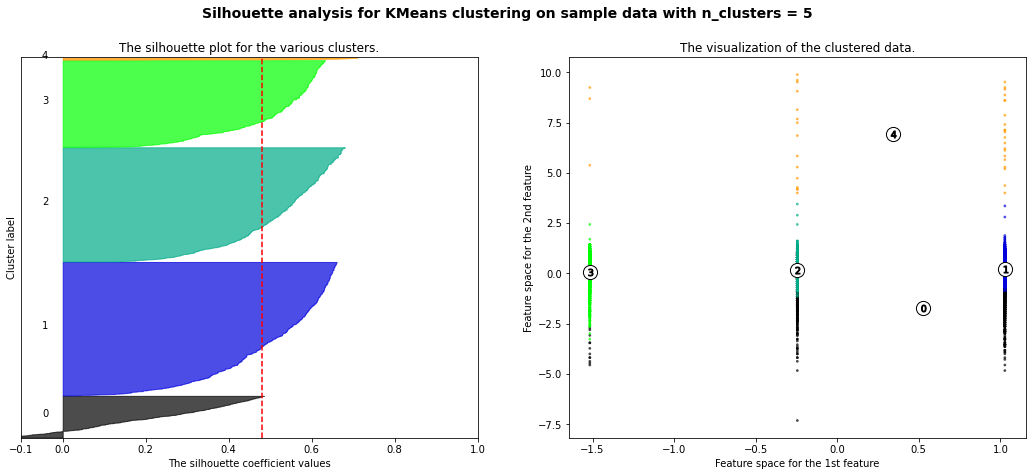

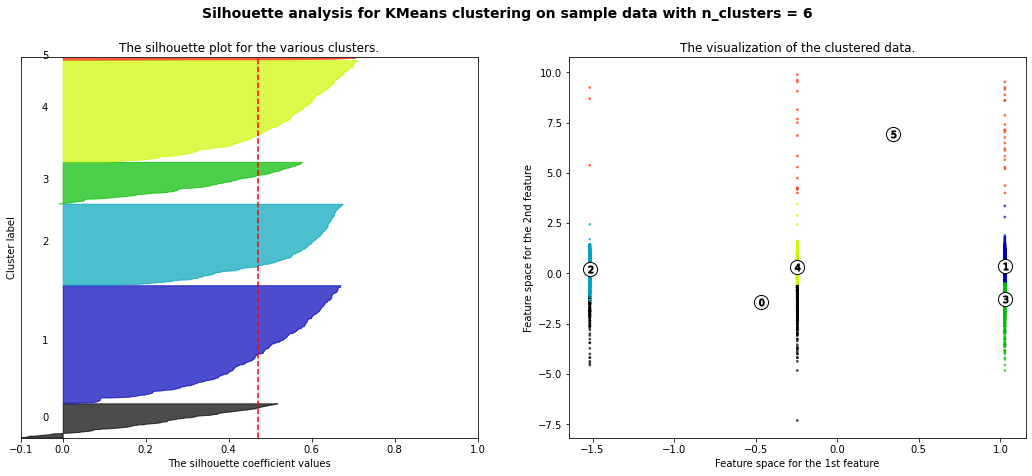

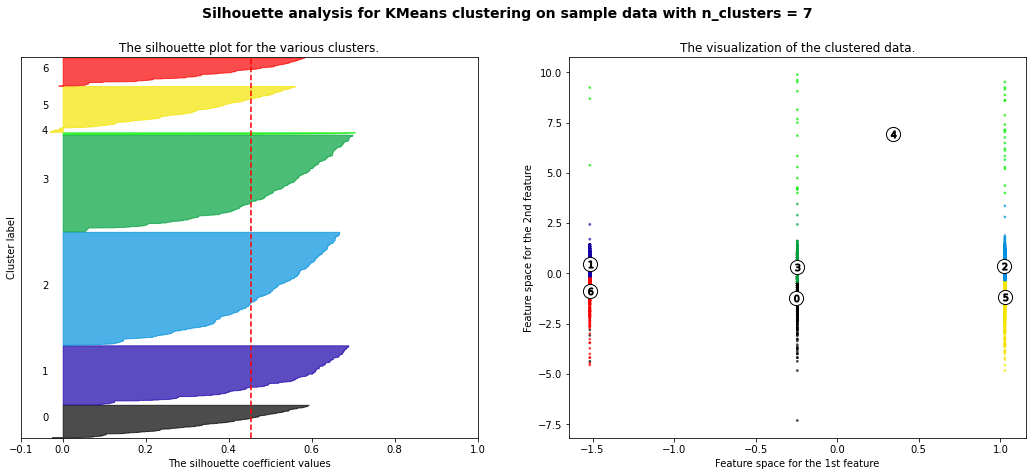

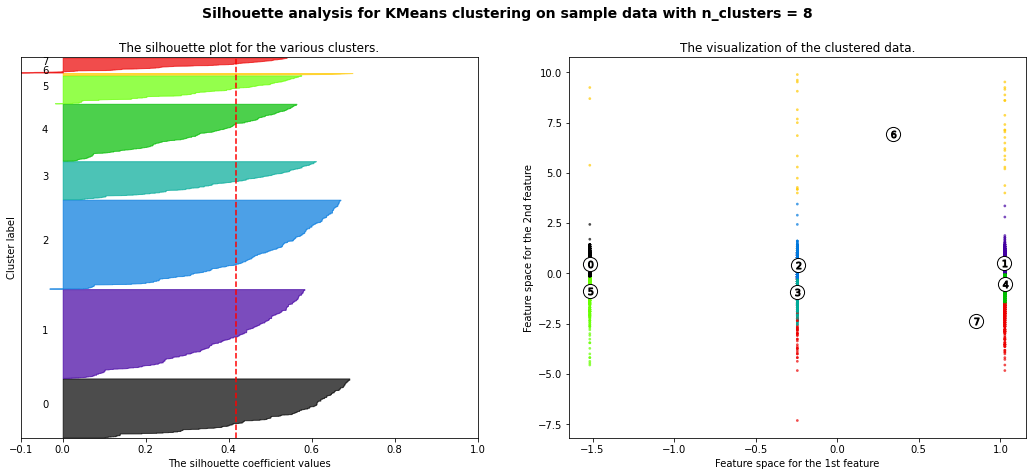

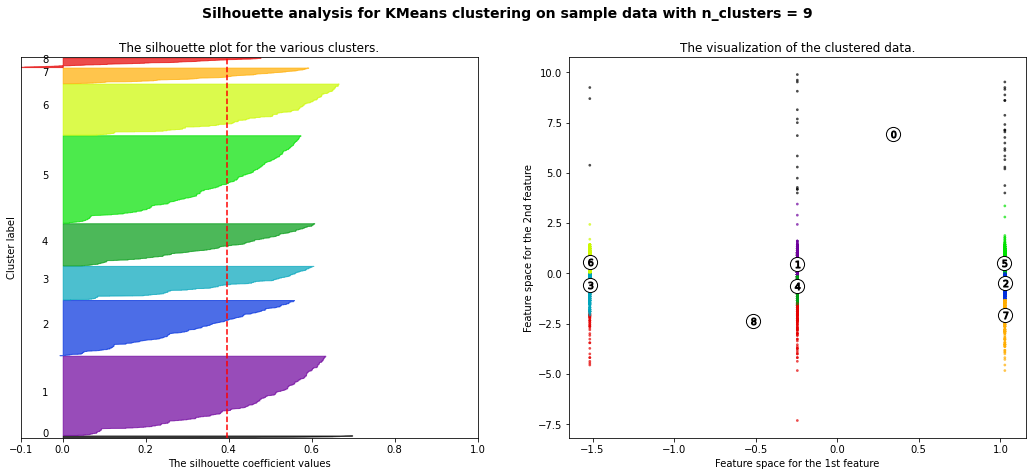

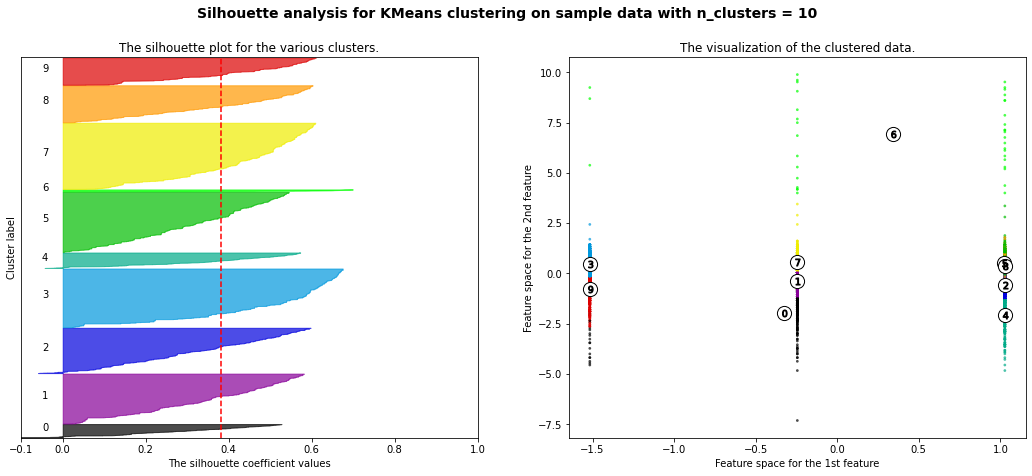

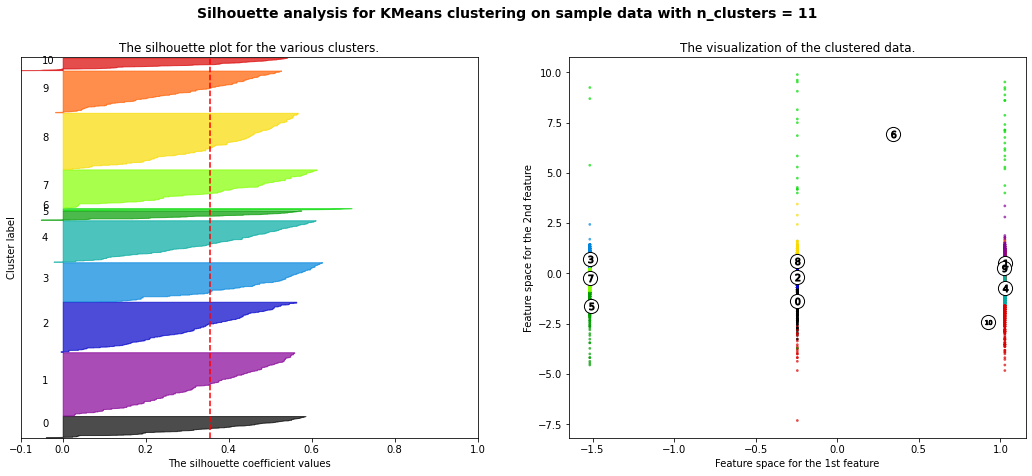

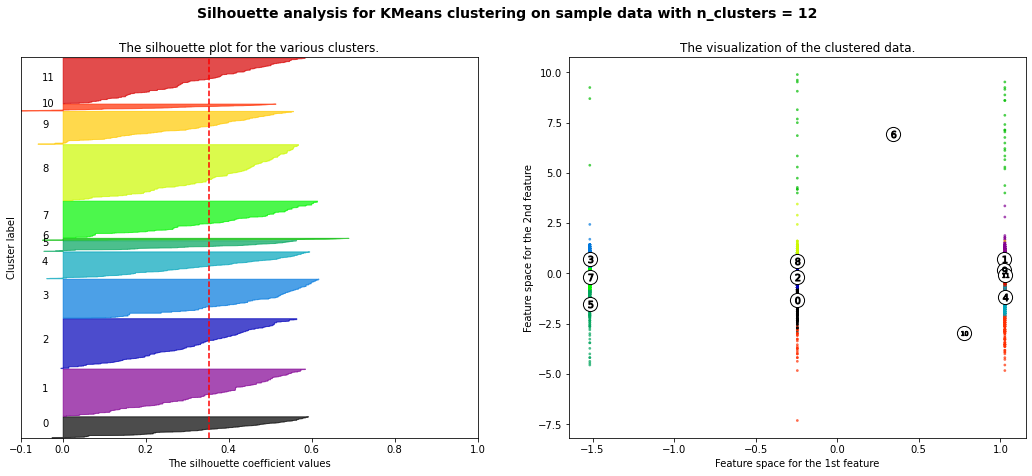

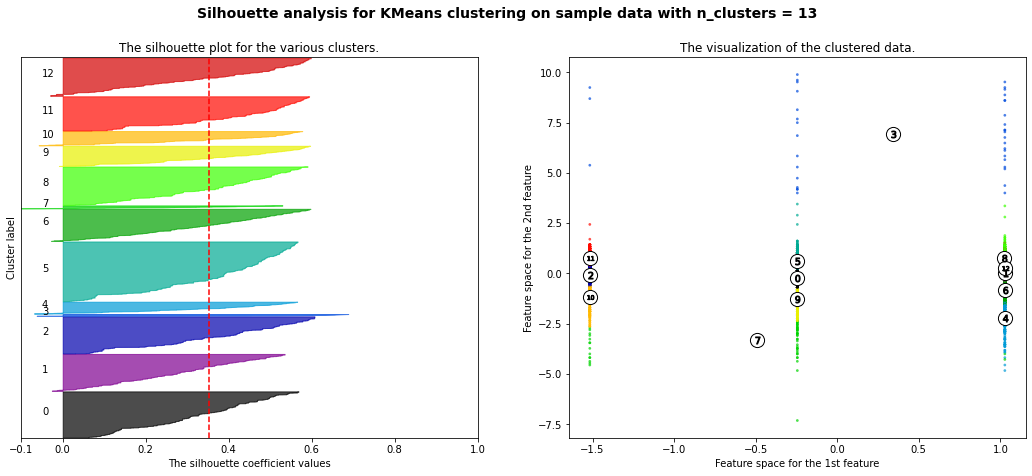

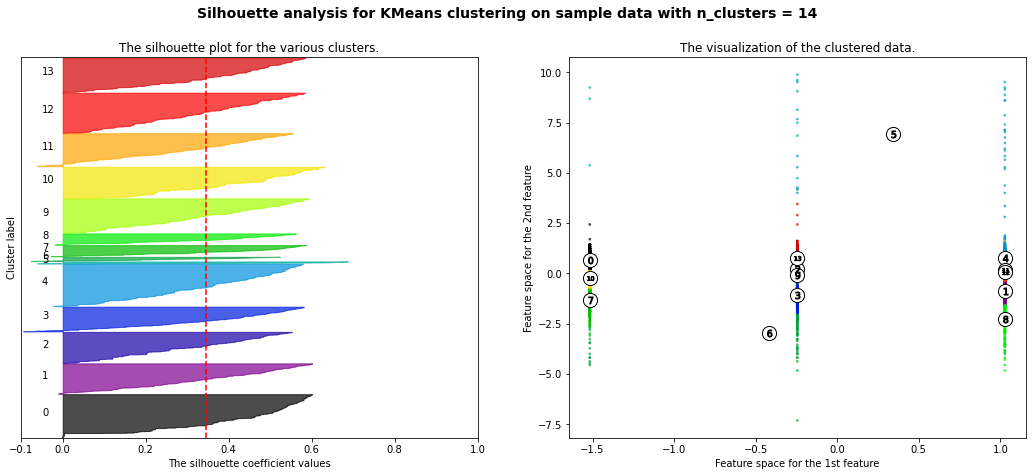

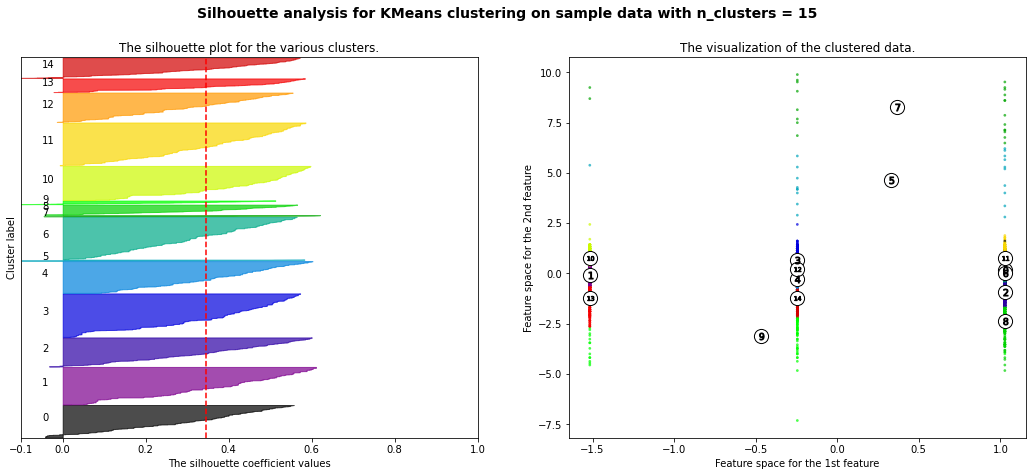

In [ ]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(H) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(H)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(H, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(H, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(H[:, 0], H[:, 1], marker = '.', s = 30, lw = 0, alpha = 0.7,
                c=colors, edgecolor = 'k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker = 'o',
                c = "white", alpha = 1, s = 200, edgecolor = 'k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1,
                    s = 50, edgecolor = 'k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize = 14, fontweight = 'bold')

plt.show()

## Elbow Method

In [ ]:
kmeans = KMeans(n_clusters = 3 )
kmeans.fit(H)
y_kmeans= kmeans.predict(H)

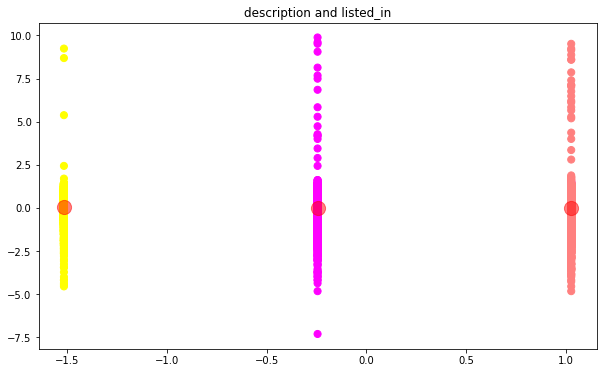

In [ ]:
plt.figure(figsize=(10 , 6))
plt.title('description and listed_in')
plt.scatter(H[:, 0], H[:, 1], c = y_kmeans, s = 50, cmap = 'spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.5)

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)


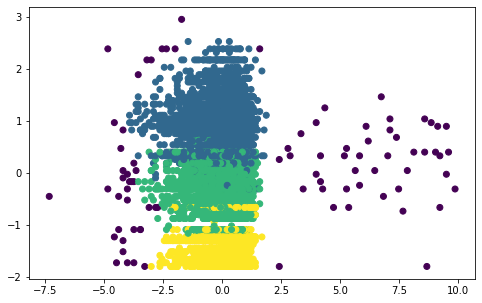

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps = 0.5, min_samples = 15).fit_predict(H)
plt.figure(figsize=( 8 , 5 ))
plt.scatter(H[:,1], H[:,2], c = y_pred)

## Dendrogram

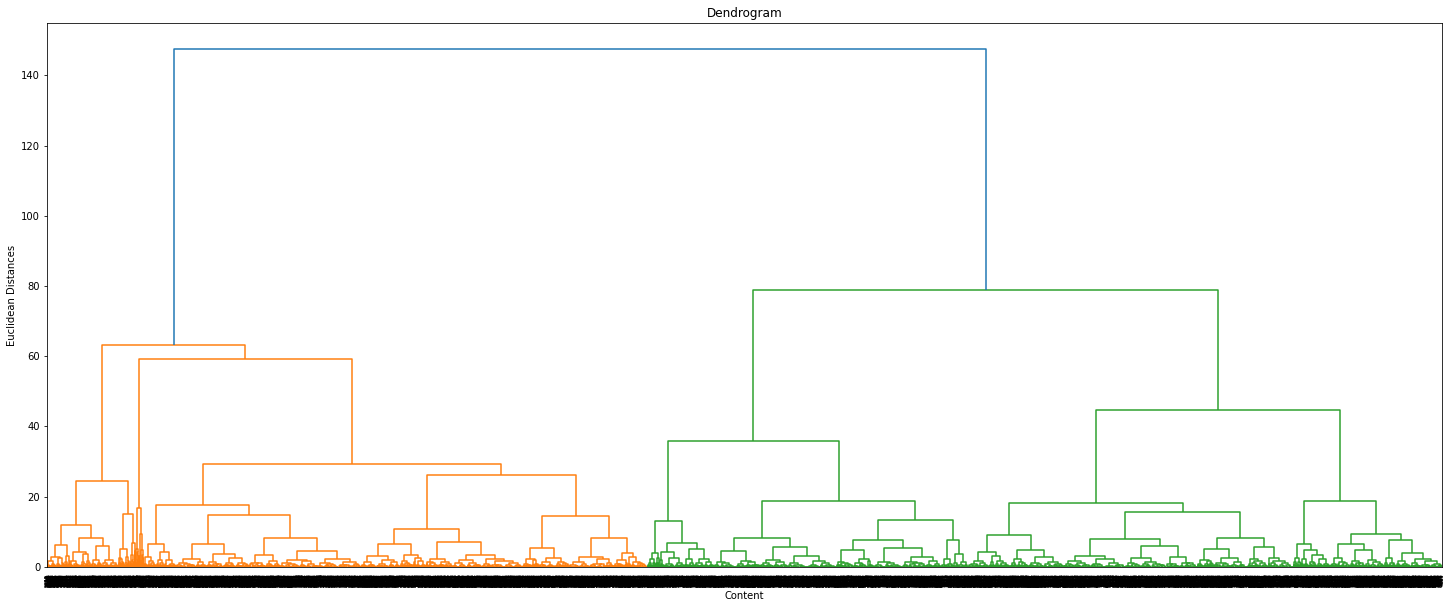

In [ ]:
# Let's import sch
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (25,10))
dendrogram = sch.dendrogram(sch.linkage(H, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()

## AgglomerativeClustering

In [ ]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(H)

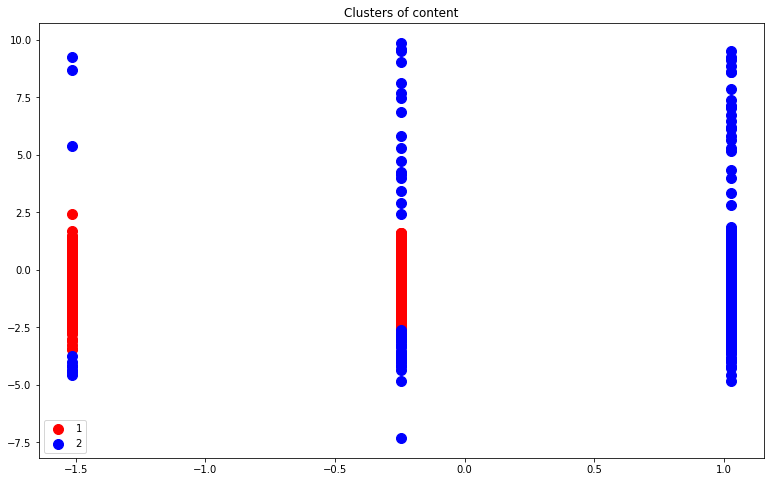

In [ ]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(H[y_hc == 0, 0], H[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(H[y_hc == 1, 0], H[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
# plt.scatter(H[y_hc == 2, 0], H[y_hc == 2, 1], s = 100, c = 'green', label = '3')

plt.title('Clusters of content')

plt.legend()
plt.show()